# Tests
I want to test the classification via the reversed condition $\frac{\sigma_n}{\sigma_1}$ on some examples. We only consider the first derivative here
1. $exp(at + x)$ solves $u_t=au=au_x$
2. $cos(at - x)$ solves $u_t=-au_x$
3. $-sin(at - x)$ solves $u_t=-au_x$
4. $(at + x)exp(b t)$ solves $u_t=au_x + bu$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank, svd
import pandas as pd
import pysindy as ps
import os
from sfranco_analysis import *

## Do it for all problems

In [6]:
experiment_names= ['linear_nonunique_1','linear_unique_1.1','linear_unique_1.2','linear_unique_1.3']

### Order derivative 1

linear_nonunique_1
exp(-0.471435163732493*t + x)


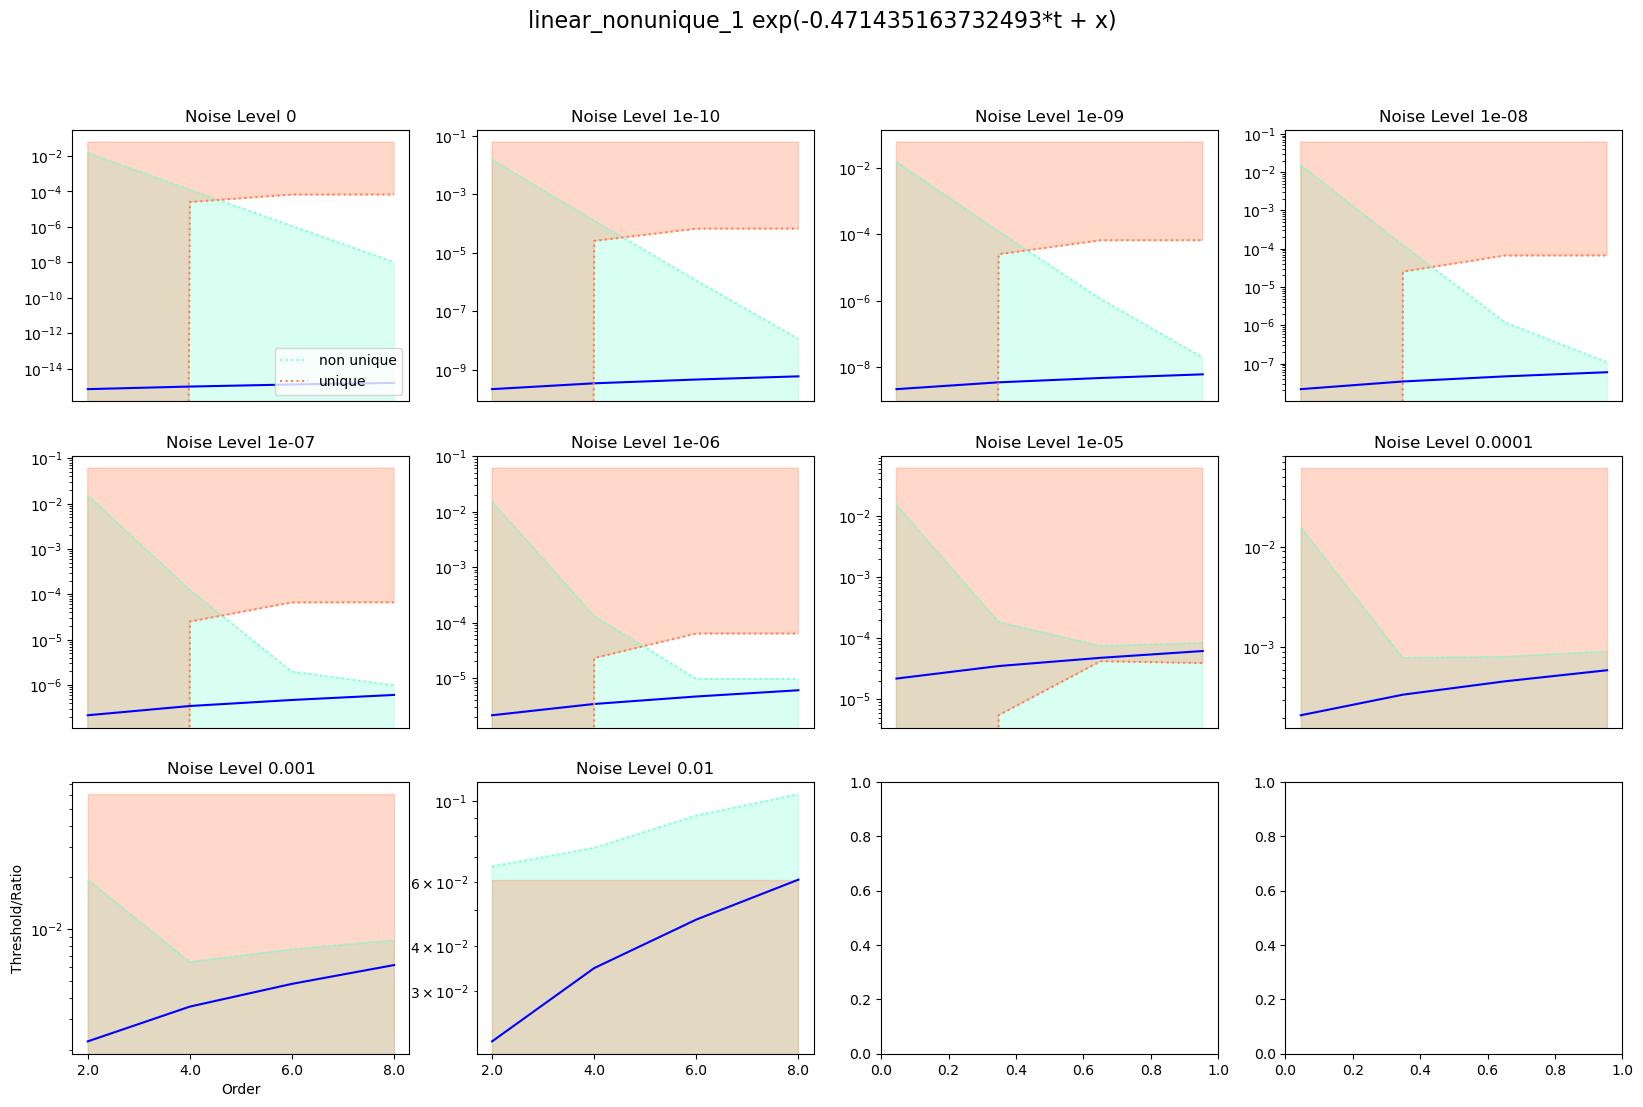

linear_unique_1.1
cos(0.471435163732493*t - x)


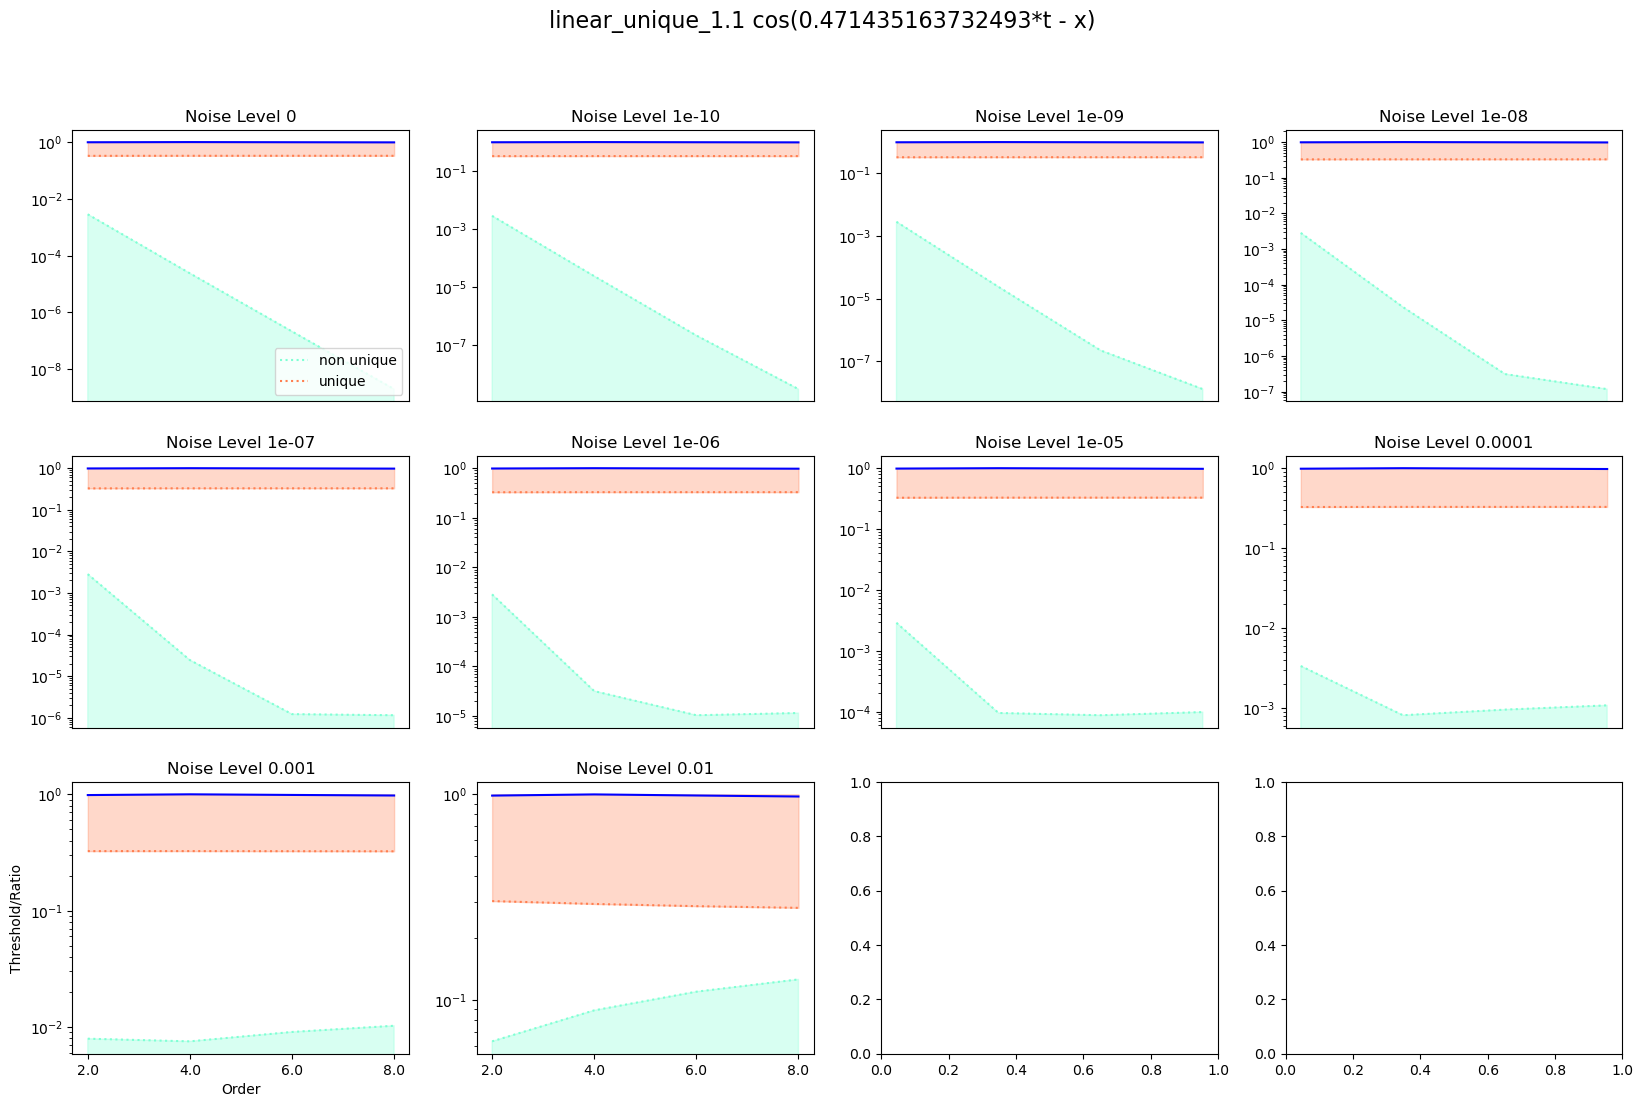

linear_unique_1.2
-sin(0.471435163732493*t - x)


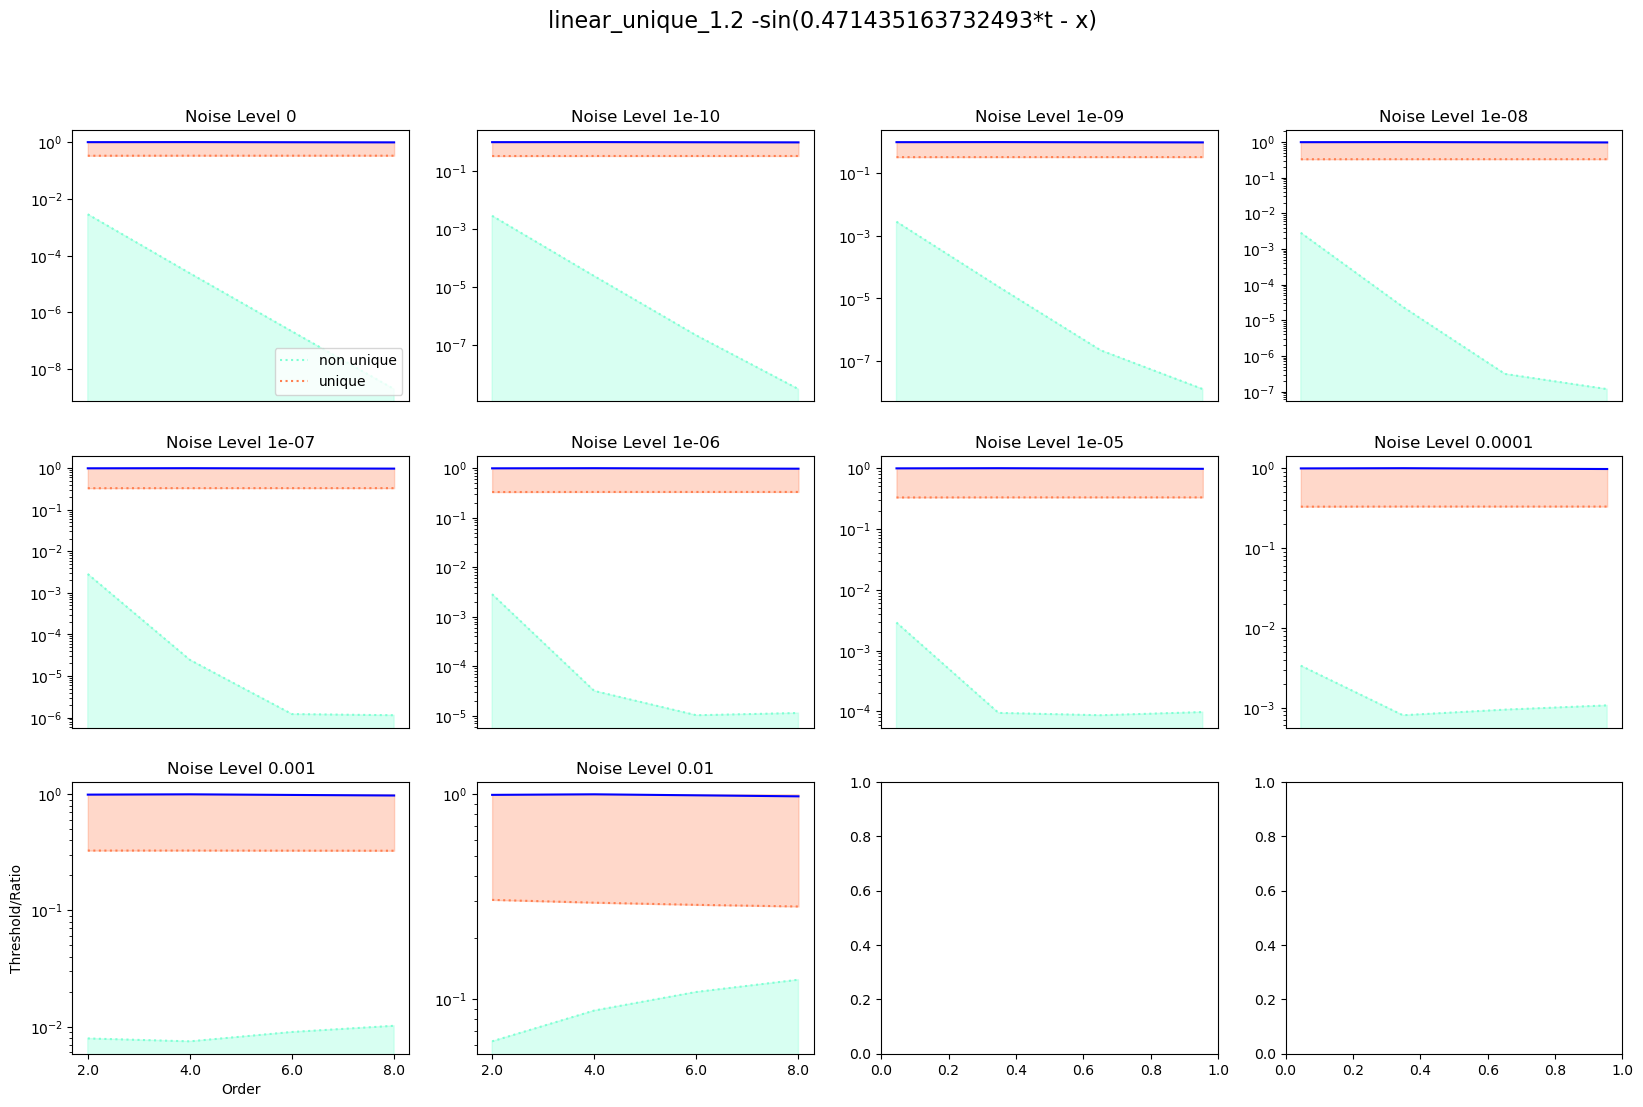

linear_unique_1.3
4*t*x - sin(0.471435163732493*t - x) + sin(0.471435163732493*t + x)


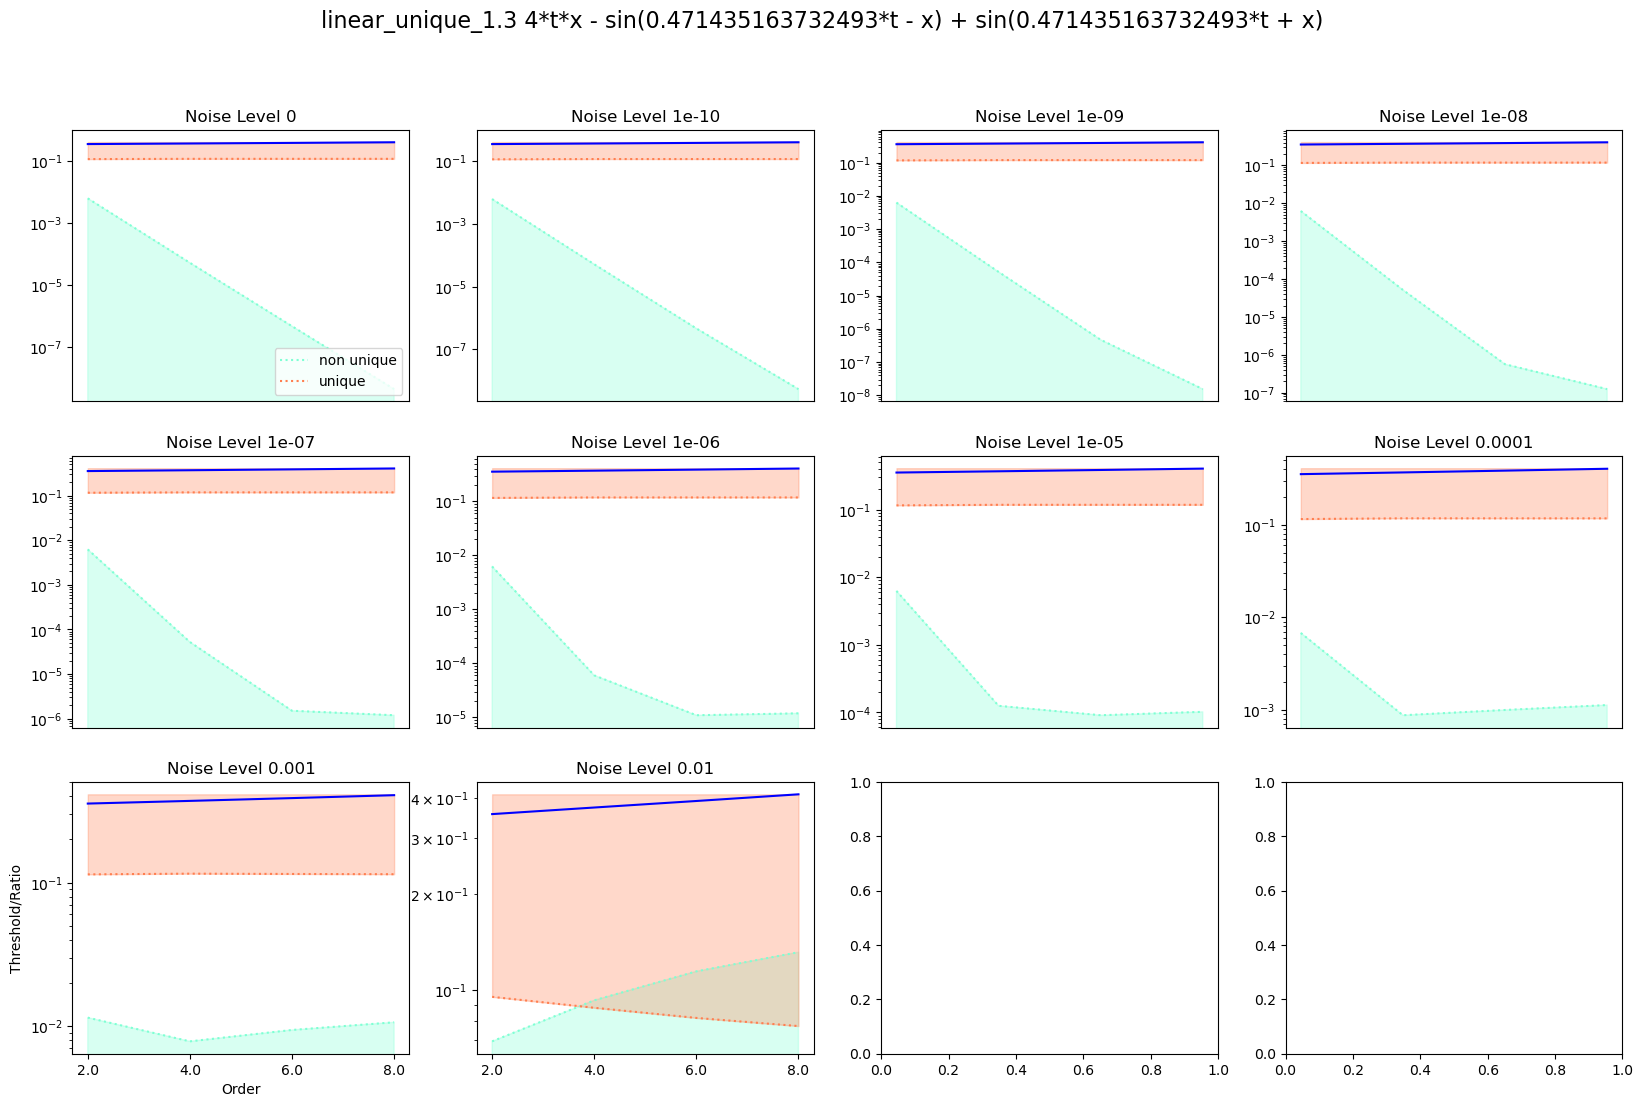

In [8]:
for experiment_name in experiment_names:
    
    #Get data
    u,x,t,formula = experiment_data(n_samples=50,experiment_name=experiment_name)
    dx=x[1]-x[0]
    dt=t[1]-t[0]
    print(experiment_name)
    print(formula)
    noise_levels = [0]+[10**(-10+i) for i in range(0,9)]
    result = get_result_df(u,dx,noise_levels,boundary=True)
    #Save results
    # Creating the directory if it doesn't exist
    directory_path="results/" + experiment_name
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
    result.to_csv(directory_path+"/results.csv")

    plot_uniq_non_uniq_class_with_noise_levels(noise_levels,result,"results/"+experiment_name+"/classification_noise_level.png", title=f"{experiment_name} {formula}")

### Order derivative 2

linear_nonunique_1
exp(-0.471435163732493*t + x)


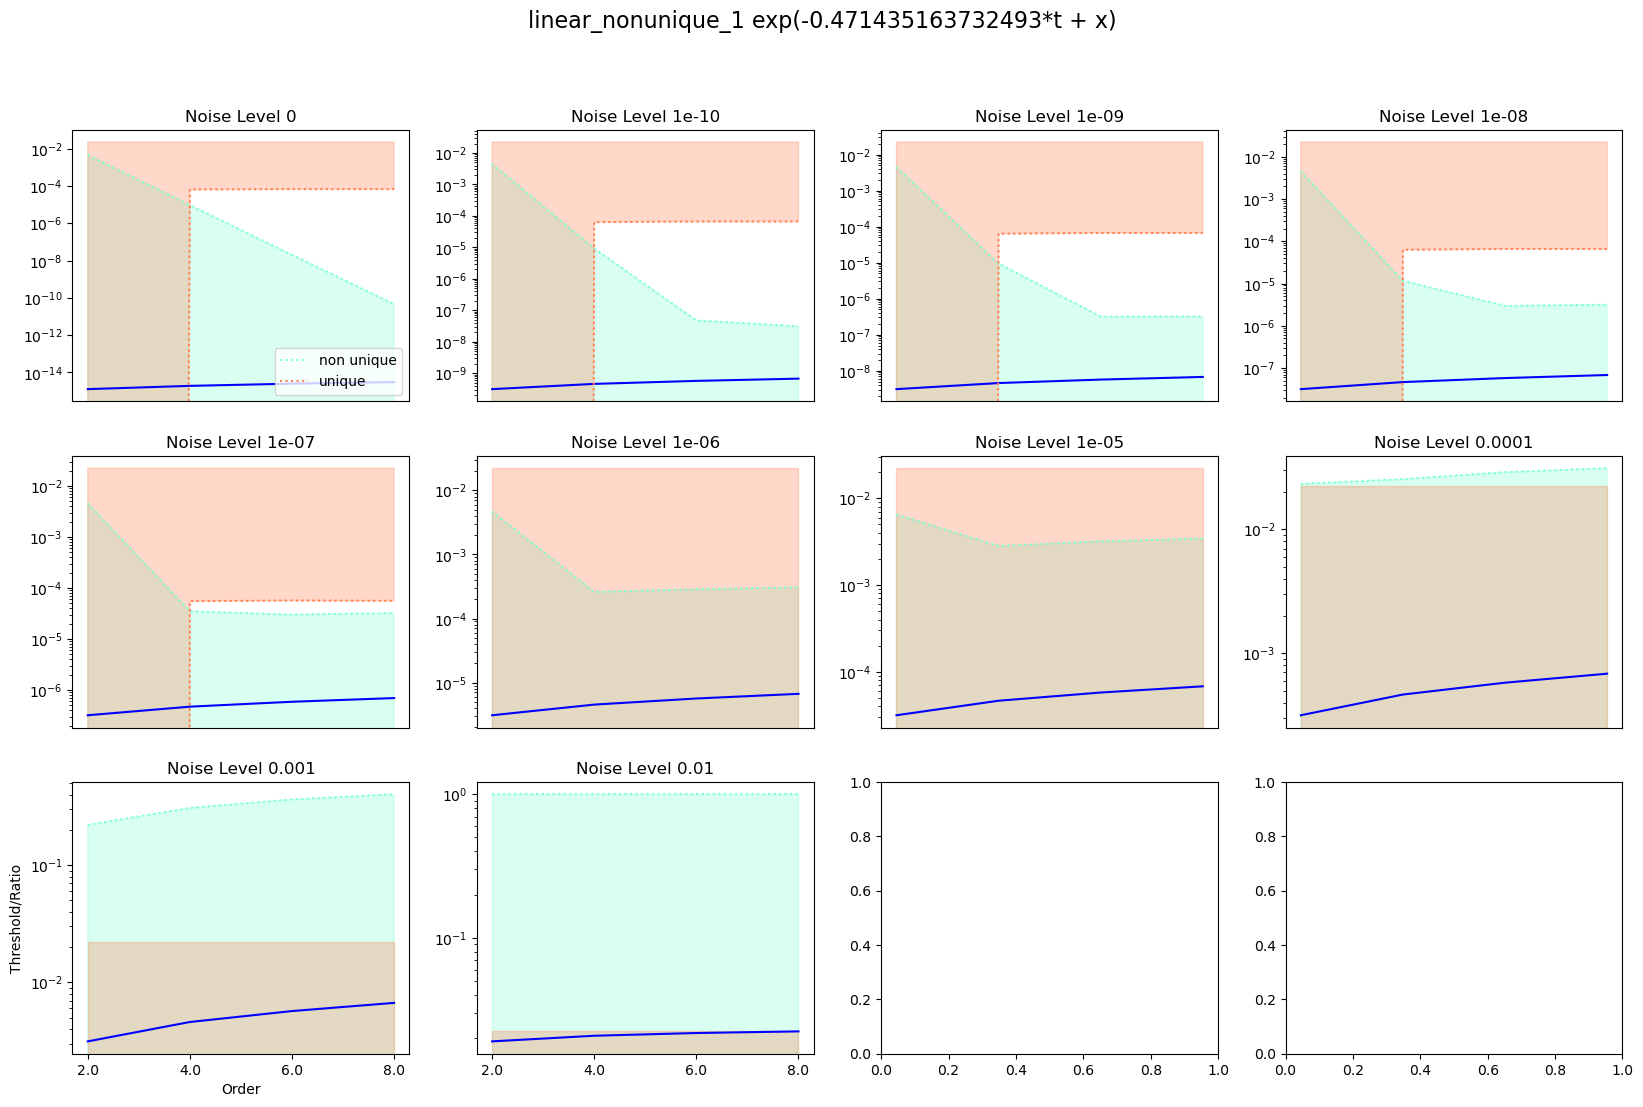

linear_unique_1.3
4*t*x - sin(0.471435163732493*t - x) + sin(0.471435163732493*t + x)


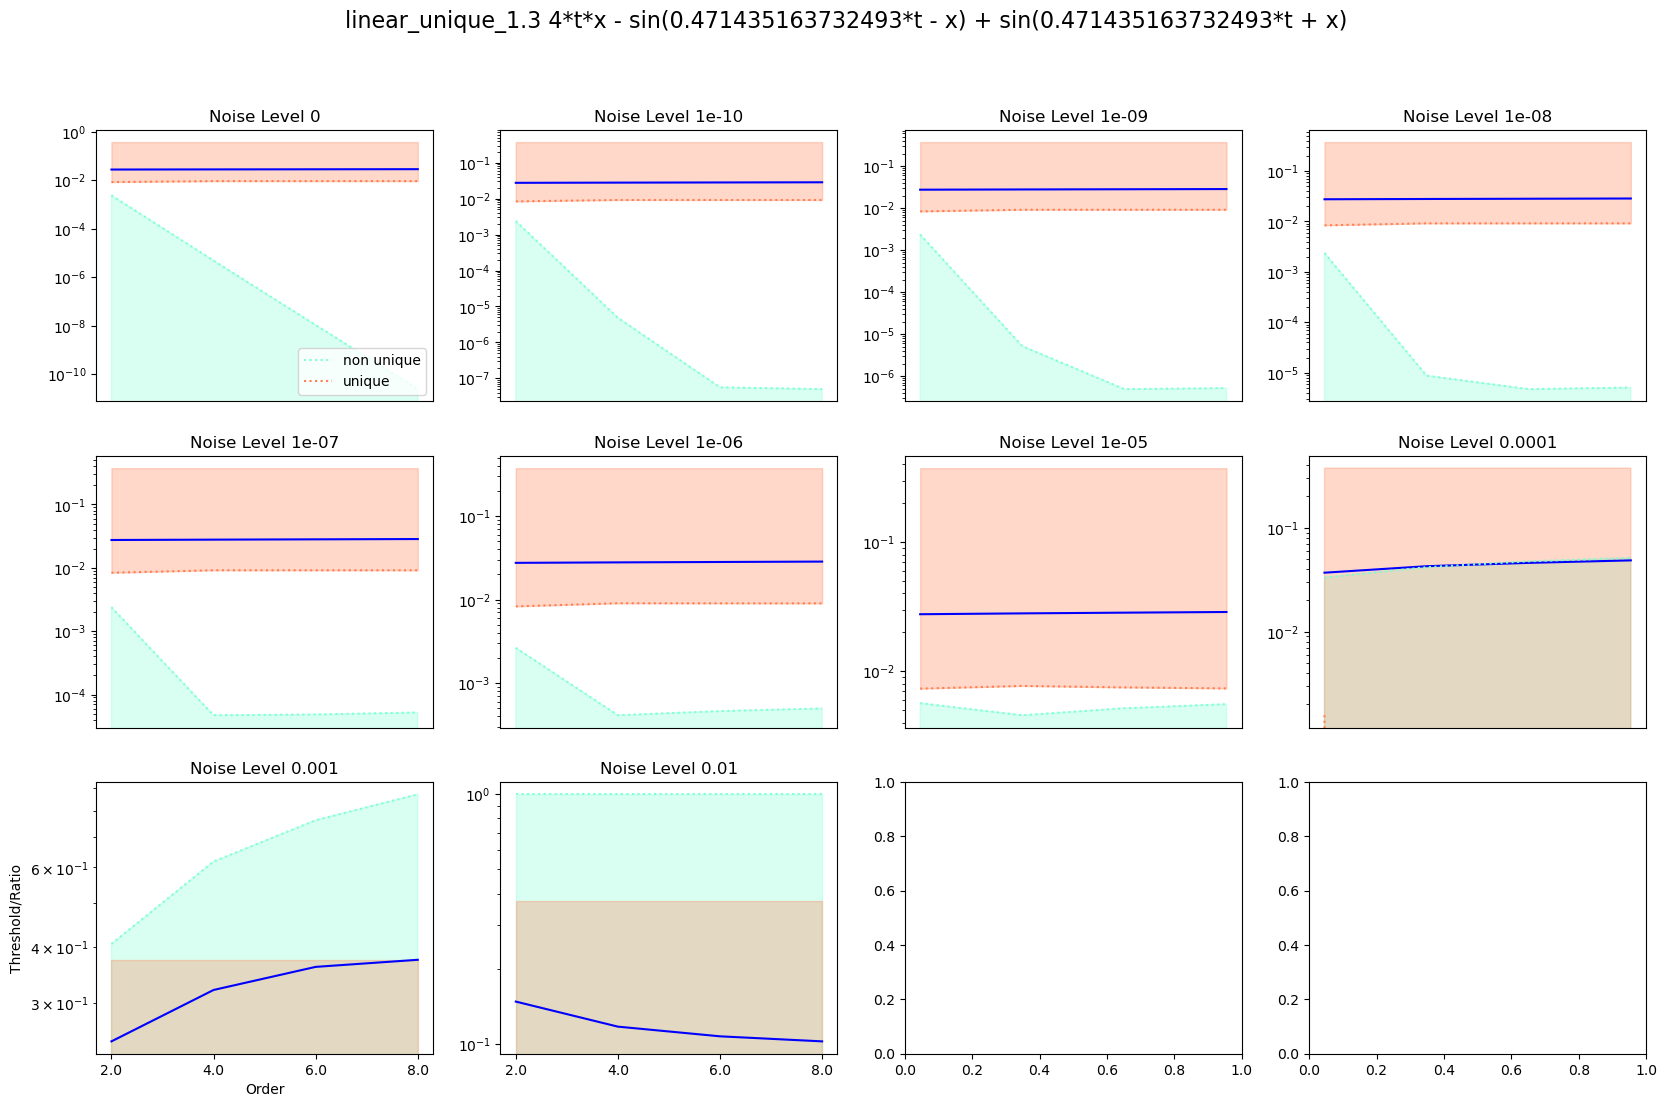

In [14]:
for experiment_name in experiment_names:   
    #Get data
    u,x,t,formula = experiment_data(n_samples=100,experiment_name=experiment_name)
    dx=x[1]-x[0]
    dt=t[1]-t[0]
    print(experiment_name)
    print(formula)
    noise_levels = [0]+[10**(-10+i) for i in range(0,9)]
    result = get_result_df(u,dx,noise_levels,orders=range(2,10,2),max_order_derivative=2,Cxi=1.0,boundary=True)
    #Save results
    # Creating the directory if it doesn't exist
    directory_path="results/" + experiment_name
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
    result.to_csv(directory_path+"/results.csv")

    plot_uniq_non_uniq_class_with_noise_levels(noise_levels,result,"results/"+experiment_name+"/classification_noise_level.png", title=f"{experiment_name} {formula}")

### Order derivative 3

linear_nonunique_1
exp(-0.471435163732493*t + x)


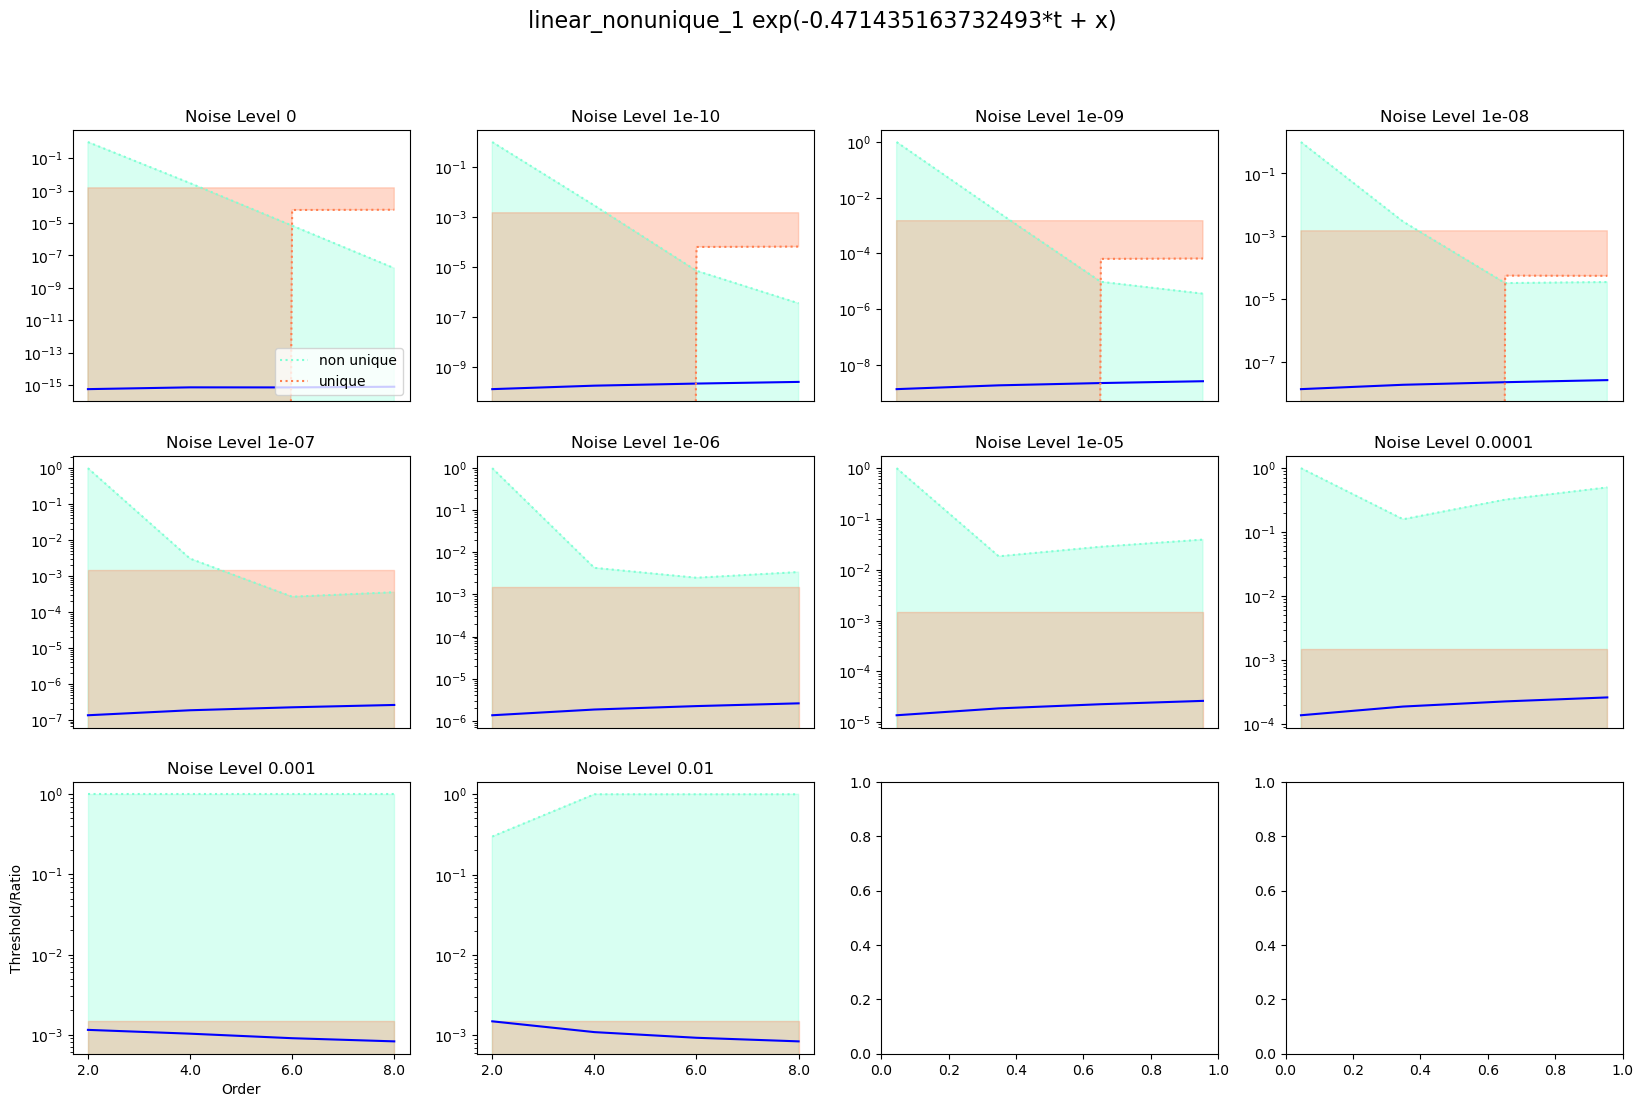

linear_unique_1.3
4*t*x - sin(0.471435163732493*t - x) + sin(0.471435163732493*t + x)


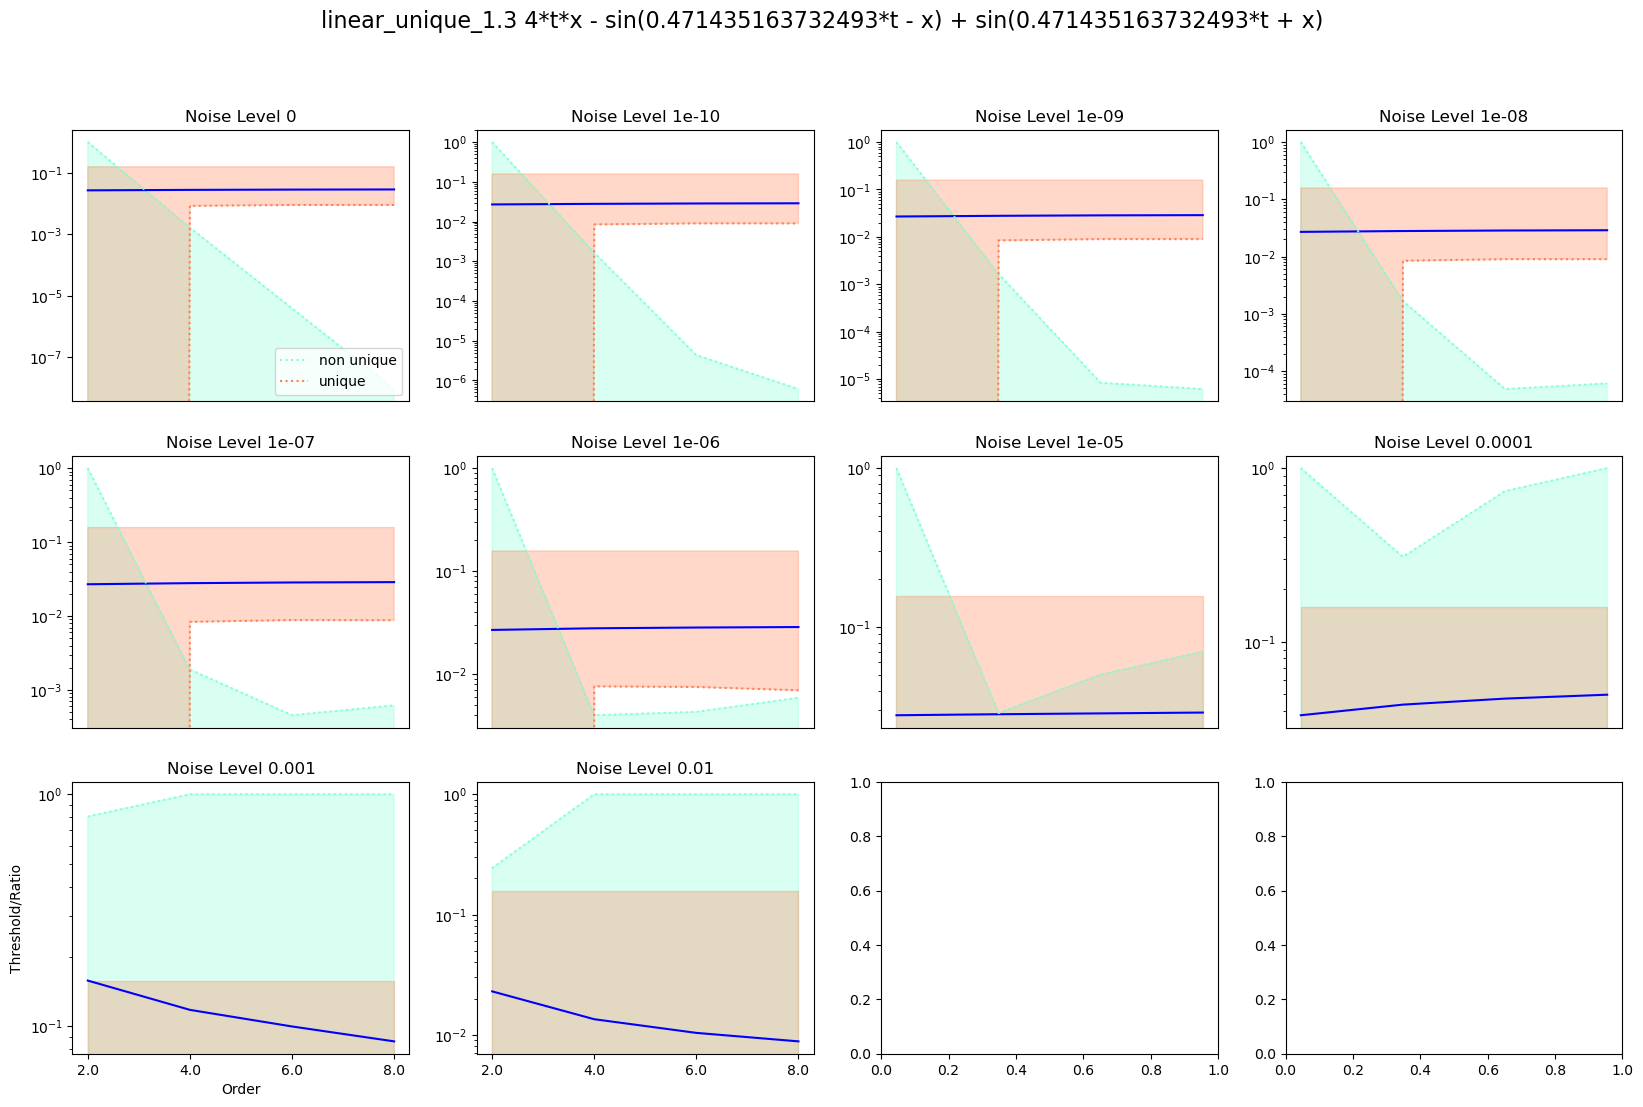

In [19]:
for experiment_name in experiment_names:
    
    #Get data
    u,x,t,formula = experiment_data(n_samples=100,experiment_name=experiment_name)
    dx=x[1]-x[0]
    dt=t[1]-t[0]
    print(experiment_name)
    print(formula)
    noise_levels = [0]+[10**(-10+i) for i in range(0,9)]
    result = get_result_df(u,dx,noise_levels,orders=range(2,10,2),max_order_derivative=3,Cxi=1.0,boundary=True)
    #Save results
    # Creating the directory if it doesn't exist
    directory_path="results/" + experiment_name
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
    result.to_csv(directory_path+"/results.csv")
    
    plot_uniq_non_uniq_class_with_noise_levels(noise_levels,result,"results/"+experiment_name+"/classification_noise_level.png", title=f"{experiment_name} {formula}")

## Plots for paper

In [25]:
experiment_names= ['linear_nonunique_1','linear_unique_1.2']

In [28]:
#Plots classification for different noise leevels
def plot_paper(noise_levels,result,image_path,title='Classification for different Noise Levels'):
    num_cols = 2
    ticksize=18
    num_rows = int(np.ceil(len(noise_levels)/num_cols))
    fig, axs = plt.subplots(num_rows, num_cols,  figsize=(5*num_cols, 4 *num_rows))
    #fig.suptitle(title, fontsize=tickssize)
    
    # Iterate over noise levels
    j=0
    for i, noise_level in enumerate(noise_levels,start=0):
        df = result[result["noise_level"] == noise_level]
        #print(i//(num_rows), j%(num_cols))
 
        axs[i//(num_rows), j%(num_cols)].set_title(f"Noise Level {noise_level}", fontsize=ticksize)
        axs[i//(num_rows), j%(num_cols)].plot(df["ratio"], color='blue',label =r"$\frac{\sigma_n}{\sigma_1}$" )
        axs[i//(num_rows), j%(num_cols)].plot(df["threshold_exact_nonuniq"], ':', label='non unique', color='aquamarine')
        axs[i//(num_rows), j%(num_cols)].fill_between(df.index, 0, df["threshold_exact_nonuniq"], color='aquamarine', alpha=0.3)

        max_val = max(result["ratio"].max(),df["threshold_exact_uniq"].max(),df["threshold_exact_nonuniq"].max())
        axs[i//(num_rows), (j)%num_cols].plot(df["threshold_exact_uniq"], ':', label='unique', color='coral')
        axs[i//(num_rows), (j)%num_cols].fill_between(df.index, df["threshold_exact_uniq"], y2=max_val, color='coral', alpha=0.3)
        axs[i//(num_rows), (j)%num_cols].set_yscale('log')
        
        #Only show legend in first plot
        if i ==0:
            axs[i//(num_rows), j%(num_cols)].legend(loc=4, fontsize=ticksize - 4)
            
        #Only show y and x label in last plot
        if i//(num_rows) == num_rows-1:
            axs[i//(num_rows), j%(num_cols)].set_xticks(df.index)
            axs[i//(num_rows), j%(num_cols)].set_xticklabels(df.order, fontsize=ticksize-2)
            if j%(num_cols) == 0: 
                #axs[i//(num_rows), j%(num_cols)].set_ylabel('Threshold/Ratio', fontsize=ticksize)
                axs[i//(num_rows), j%(num_cols)].set_xlabel('Order', fontsize=ticksize)
        else:
            #Get rid of x labels
            axs[i//(num_rows), j%(num_cols)].set_xticks([])
        
        j+=1

    # Set common labels
    for ax in axs.flat:
        ax.label_outer()
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(ticksize-2)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(ticksize-2)
            
    # Show the plot
    fig.savefig(image_path.replace('.svg','.png'))
    fig.savefig(image_path,format='svg')
    plt.show()

linear_nonunique_1
exp(-0.471435163732493*t + x)


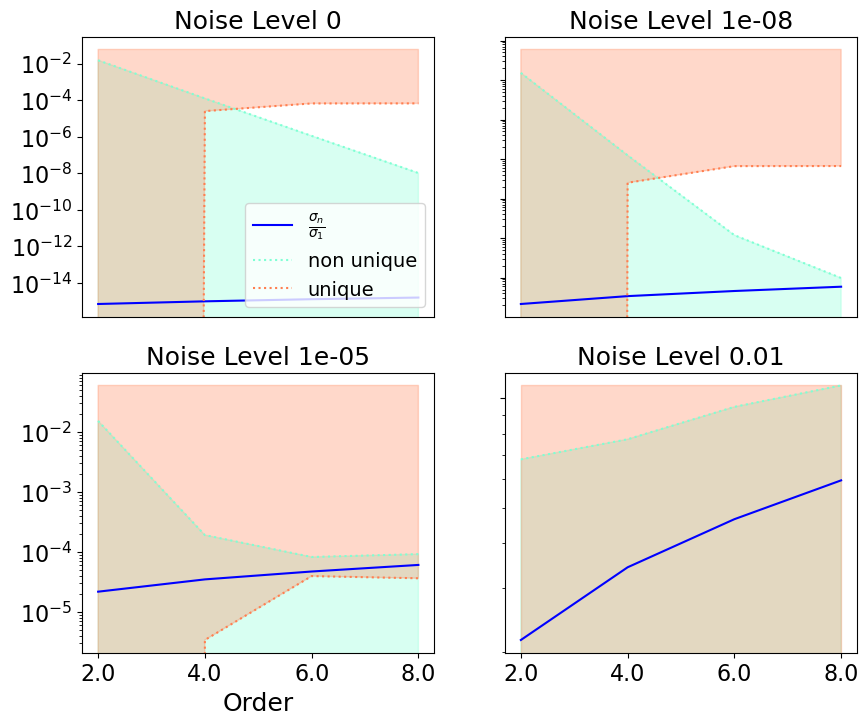

linear_unique_1.2
-sin(0.471435163732493*t - x)


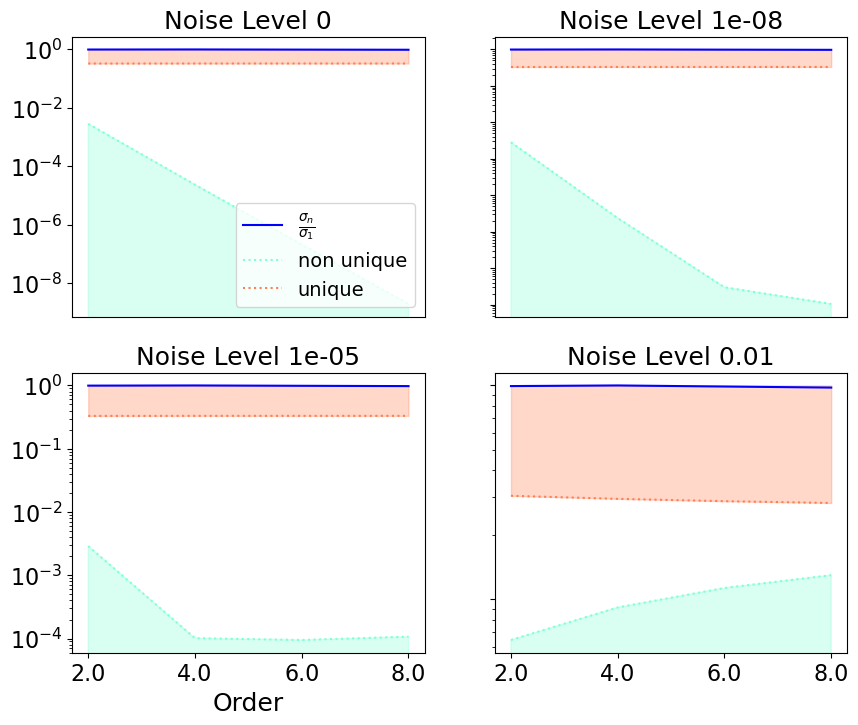

In [29]:
noise_levels = [0,1e-08,1e-05,1e-02]
for experiment_name in experiment_names:
    
    #Get data
    u,x,t,formula = experiment_data(n_samples=50,experiment_name=experiment_name)
    dx=x[1]-x[0]
    dt=t[1]-t[0]
    print(experiment_name)
    print(formula)
    
    result = get_result_df(u,dx,noise_levels,boundary=True)
    #Save results
    # Creating the directory if it doesn't exist
    directory_path="results/" + experiment_name
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)
    result.to_csv(directory_path+"/results.csv")

    plot_paper(noise_levels,result,"Paper/"+experiment_name+"/classification_noise_level_sfranco_paper.svg", title=f"{experiment_name} {formula}")